![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [5]:
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

array([[<Axes: title={'center': 'fetal_health'}>]], dtype=object)

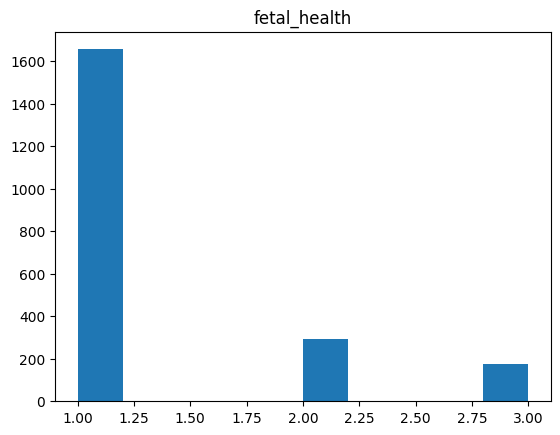

In [6]:
df.hist(column='fetal_health',grid=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#@title decision tree, no RFE
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,y_pred))

print('\nReporte de clasificación')
print(classification_report(y_test,y_pred))

# clf = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Matriz de confusión
[[479  13   4]
 [ 19  81   1]
 [  2   0  39]]

Reporte de clasificación
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       496
         2.0       0.86      0.80      0.83       101
         3.0       0.89      0.95      0.92        41

    accuracy                           0.94       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638

Cross-Validation Scores: [0.84976526 0.85411765 0.89411765 0.85176471 0.70117647]
Mean CV Score: 0.8301883457608396


In [9]:
#@title decision tree with RFE
clf = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

clf.fit(X_train_rfe, y_train)
y_pred = clf.predict(X_test_rfe)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,y_pred))

print('\nReporte de clasificación')
print(classification_report(y_test,y_pred))

cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Matriz de confusión
[[461  27   8]
 [ 24  76   1]
 [  3   0  38]]

Reporte de clasificación
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       496
         2.0       0.74      0.75      0.75       101
         3.0       0.81      0.93      0.86        41

    accuracy                           0.90       638
   macro avg       0.83      0.87      0.85       638
weighted avg       0.90      0.90      0.90       638

Cross-Validation Scores: [0.84976526 0.85411765 0.89411765 0.85176471 0.70117647]
Mean CV Score: 0.8301883457608396


In [10]:
#@title KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,y_pred))

print('\nReporte de clasificación')
print(classification_report(y_test,y_pred))

cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Matriz de confusión
[[470  23   3]
 [ 36  61   4]
 [  5   4  32]]

Reporte de clasificación
              precision    recall  f1-score   support

         1.0       0.92      0.95      0.93       496
         2.0       0.69      0.60      0.65       101
         3.0       0.82      0.78      0.80        41

    accuracy                           0.88       638
   macro avg       0.81      0.78      0.79       638
weighted avg       0.88      0.88      0.88       638

Cross-Validation Scores: [0.81220657 0.82117647 0.89882353 0.83529412 0.70823529]
Mean CV Score: 0.8151471969069318


In [12]:
#@title Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,y_pred))

print('\nReporte de clasificación')
print(classification_report(y_test,y_pred))

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Matriz de confusión
[[487   7   2]
 [ 21  77   3]
 [  2   1  38]]

Reporte de clasificación
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.91      0.76      0.83       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638

Cross-Validation Scores: [0.87558685 0.90352941 0.92       0.87058824 0.75058824]
Mean CV Score: 0.864058547362607
